In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML, display_html
import datetime

In [65]:
np.random.seed(1)

In [66]:
crime_district = pd.read_csv('crime_district.csv')

In [70]:
crime_district.head()
crime_district.drop('Unnamed: 0', axis = 1, inplace = True)

,Unnamed: 0,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,OCCURRED_ON_DATE,DAY_OF_WEEK,HOUR,DATE,DATE_HOUR,DATE_MONTH
0,0,3831,Motor Vehicle Accident Response,E5,2019-04-14 16:00:00,Sunday,16,2019-04-14,2019-04-14 16:00:00,2019-04-01
1,1,3410,Towed,C11,2019-04-16 20:25:00,Tuesday,20,2019-04-16,2019-04-16 21:00:00,2019-04-01
2,2,3006,Medical Assistance,B3,2019-04-16 20:57:00,Tuesday,20,2019-04-16,2019-04-16 21:00:00,2019-04-01
3,3,413,Aggravated Assault,B2,2019-04-16 20:52:00,Tuesday,20,2019-04-16,2019-04-16 21:00:00,2019-04-01
4,4,802,Simple Assault,B2,2019-04-16 20:52:00,Tuesday,20,2019-04-16,2019-04-16 21:00:00,2019-04-01


In [14]:
districts = crime_district['DISTRICT'].unique()

In [6]:
# def get_date_month(date):
#     components = date.split('-')
#     date_month = pd.to_datetime(components[0] + '-' + components[1])
#     return date_month

In [7]:
# crime_district['DATE_MONTH'] = crime_district['OCCURRED_ON_DATE'].apply(lambda date: get_date_month(date))

In [8]:
# crime_district.to_csv('crime_district.csv')

In [15]:
district_date_dfs = []
district_month_dfs = []

In [18]:
for i in range(len(districts)):
    df = crime_district[crime_district['DISTRICT'] == districts[i]].groupby('DATE').size()
    s = sum(df.isnull())
    district_date_dfs.append(df)
    print(f'{districts[i]} has records for {df.shape[0]} days with {s} nulls')

E5 has records for 1402 days with 0 nulls
C11 has records for 1402 days with 0 nulls
B3 has records for 1402 days with 0 nulls
B2 has records for 1402 days with 0 nulls
D14 has records for 1402 days with 0 nulls
D4 has records for 1402 days with 0 nulls
E13 has records for 1402 days with 0 nulls
A15 has records for 1388 days with 0 nulls
A7 has records for 1402 days with 0 nulls
A1 has records for 1402 days with 0 nulls
E18 has records for 1402 days with 0 nulls
C6 has records for 1402 days with 0 nulls


In [20]:
for i in range(len(districts)):
    df = crime_district[crime_district['DISTRICT'] == districts[i]].groupby('DATE_MONTH').size()
    df = df[1:(df.shape[0] - 1)] #removing records for the first and last months in the dataset since they are not whole months
    s = sum(df.isnull())
    district_month_dfs.append(df)
    print(f'{districts[i]} has records for {df.shape[0]} months with {s} nulls')

E5 has records for 45 months with 0 nulls
C11 has records for 45 months with 0 nulls
B3 has records for 45 months with 0 nulls
B2 has records for 45 months with 0 nulls
D14 has records for 45 months with 0 nulls
D4 has records for 45 months with 0 nulls
E13 has records for 45 months with 0 nulls
A15 has records for 45 months with 0 nulls
A7 has records for 45 months with 0 nulls
A1 has records for 45 months with 0 nulls
E18 has records for 45 months with 0 nulls
C6 has records for 45 months with 0 nulls


In [0]:
# imputing days for district A15
start_date = crime_district['DATE'].min() 
end_date = crime_district['DATE'].max()
time_range = list(pd.date_range(start_date, end_date, freq = 'D'))

In [0]:
A15_df = district_dfs[7]

In [0]:
A15_count = []
for i in range(len(time_range)):
    try:
        A15_count.append(A15_df.loc[str(time_range[i].date())])
    except:
        A15_count.append(0)

In [0]:
district_date_dfs[7] = pd.Series(A15_count, index = time_range)

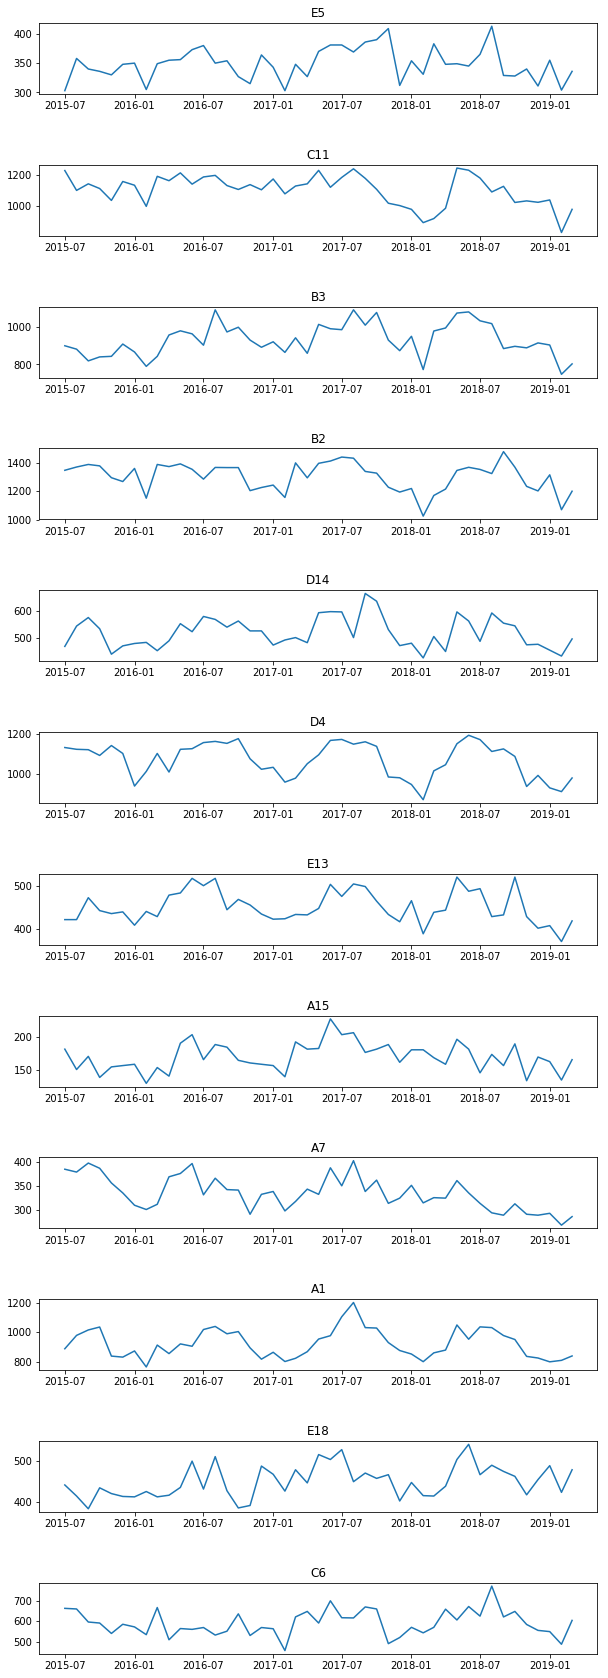

In [124]:
# plotting time series for all districts
fig, axes = plt.subplots(nrows = len(districts), figsize = (10, 30))
plt.subplots_adjust(hspace = 1)
for i in range(len(districts)):
    axes[i].plot(district_date_dfs[i])
    axes[i].set(title = districts[i])

PERFORMING HIERARCHICAL CLUSTERING BETWEEN DISTRICTS BASED ON DAILY DATA

In [0]:
# hierarchical clustering of the time series
# define the distance metric to be Dynamic Time Warping
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
def get_dtw_distance(u, v):
    distance, path = fastdtw(u, v, dist = euclidean)
    return distance

In [0]:
# calculate the distance matrix
district_distance_matrix = np.ones((len(districts), len(districts)))

In [0]:
district_big_df = pd.DataFrame(district_date_dfs)

In [0]:
district_big_df = district_big_df.T
district_big_df.fillna(0, inplace = True)

In [75]:
district_big_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
2015-06-15,18.0,31.0,26.0,35.0,16.0,41.0,8.0,0.0,10.0,25.0,13.0,16.0
2015-06-16,7.0,43.0,24.0,43.0,10.0,32.0,5.0,0.0,13.0,32.0,21.0,20.0
2015-06-17,13.0,32.0,25.0,28.0,13.0,36.0,7.0,0.0,14.0,28.0,21.0,12.0
2015-06-18,9.0,36.0,35.0,73.0,11.0,30.0,20.0,0.0,8.0,29.0,15.0,16.0
2015-06-19,11.0,38.0,39.0,60.0,20.0,31.0,8.0,0.0,6.0,36.0,18.0,15.0


In [0]:
for i in range(len(districts)):
    for j in range(len(districts)):
        district_distance_matrix[i, j] = get_dtw_distance(district_big_df.iloc[:, i], district_big_df.iloc[:, j])

In [77]:
district_distance_matrix = pd.DataFrame(district_distance_matrix)
district_distance_matrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,34086.0,25365.0,43668.0,7538.0,32225.0,7911.0,16013.0,4636.0,23801.0,6536.0,9188.0
1,34069.0,0.0,10988.0,12466.0,23204.0,8601.0,27962.0,50692.0,34861.0,12136.0,28301.0,19725.0
2,25347.0,10758.0,0.0,14422.0,15181.0,9924.0,18729.0,42737.0,26379.0,7780.0,18892.0,12747.0
3,43661.0,12757.0,14414.0,0.0,34015.0,12940.0,37986.0,59889.0,44402.0,14735.0,38450.0,29822.0
4,7419.0,23262.0,14982.0,34086.0,0.0,21331.0,7376.0,23826.0,7393.0,13672.0,6648.0,7356.0
5,32163.0,8307.0,10076.0,12980.0,21203.0,0.0,25741.0,49233.0,33168.0,10501.0,25904.0,17970.0
6,7672.0,27950.0,18687.0,38036.0,7023.0,25583.0,0.0,20735.0,7214.0,17769.0,5596.0,7964.0
7,16013.0,50692.0,42737.0,59889.0,23826.0,49233.0,20735.0,0.0,15383.0,42324.0,20743.0,27197.0
8,4620.0,34899.0,26391.0,44407.0,7369.0,33135.0,7262.0,15383.0,0.0,25286.0,6753.0,9837.0
9,23864.0,12357.0,7780.0,14711.0,13602.0,10434.0,18054.0,42324.0,25392.0,0.0,17837.0,13538.0


In [78]:
from sklearn.cluster import AgglomerativeClustering as aggclust
district_clusters = aggclust(affinity = 'precomputed', n_clusters = 3, linkage = 'single').fit(district_distance_matrix)
district_clusters.labels_

array([2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2])

BUILD NEURAL NETWORKDS TO PREDICT THE NUMBER OF CRIMES FOR FUTURE MONTHS FROM PAST MONTHS DATA

In [10]:
# build LSTM for each district
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import Callback, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

Using TensorFlow backend.


In [0]:
def get_features_and_labels(seq, window):
  features = []
  labels = []
  seq = np.reshape(np.array(seq), (-1,1))
  seq = scaler.fit_transform(seq)
  for i in range(window, len(seq)):
    features.append(seq[i - window: i])   
    labels.append(seq[i])
    
  features = np.array(features)
  # print(features.shape)
  labels = np.array(labels)
  # print(labels.shape)

  train_features = features[:features.shape[0]*80//100, :]
  # print(train_features.shape)
  train_features = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))
  train_labels = labels[:len(labels)*80//100]
  
  test_features = features[features.shape[0]*80//100:, :]
  # print(test_features.shape)
  test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
  test_labels = labels[len(labels)*80//100:]    
    
  return (train_features, train_labels, test_features, test_labels)

In [0]:
def NN_for_district(district_df, window):
  # prepare the train and test data
  
    # divide the data to train and test 
    train_features, train_labels, test_features, test_labels = get_features_and_labels(district_df, window)    
    
  # fit the model
    model = Sequential()
    model.add(Dense(units = 256))    
    model.add(Dense(units = 64)) 
#   model.add(LSTM(units = 10, input_shape = (train_features.shape[1], 1), return_sequences = True))
#   model.add(LSTM(units = 50, return_sequences = True))
#   model.add(LSTM(units = 50, return_sequences = True))
    # model.add(Flatten())
    model.add(Dense(units = 1))
    
    early_stopping = EarlyStopping(patience = 0)
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    history = model.fit(train_features, train_labels, validation_data = (test_features, test_labels), epochs = 10, batch_size = 1, verbose = 0, callbacks = [early_stopping])
    # return (history.history['loss'], history.history['val_loss'])
    # return (model, train_features, train_labels)
    return (model, test_features, test_labels)

In [0]:
tune_window = {} # window of 10
for window in range(1, 10):
  print(window)
  tune_window[window] = NN_for_district(district_month_dfs[1], window)

In [0]:
tune_window # window of 3

Dense 256 - Dense 64


In [0]:
def test_and_plot(model, test_features, test_labels):
  # test the model and plot out real vs. predicted time series
    prediction = model.predict(test_features)
#     print(prediction.shape)
#     print(test_labels.shape)
    
#     fig, ax = plt.subplots(figsize = (10, 20))
#     ax.plot(prediction[1:], color = 'green', label = 'prediction') # step of 30 if period is day
#     ax.plot(test_labels, color = 'blue', label = 'test_labels') # step of 30 if period is day
#     ax.legend()
    
    prediction = scaler.inverse_transform(prediction)
    return prediction

In [0]:
def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)

In [34]:
model, test_features, test_labels = NN_for_district(district_month_dfs[2], 3)

(42, 3, 1)
(42, 1)
(33, 3, 1)
(9, 3, 1)
Train on 33 samples, validate on 9 samples
Epoch 1/10
33/33 [==============================] - 1s 16ms/step - loss: 0.0884 - val_loss: 0.0861
Epoch 2/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0604 - val_loss: 0.0731
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0638
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0615 - val_loss: 0.0420
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.0408
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0844


(9, 1)
(9, 1)


array([885.5065], dtype=float32)

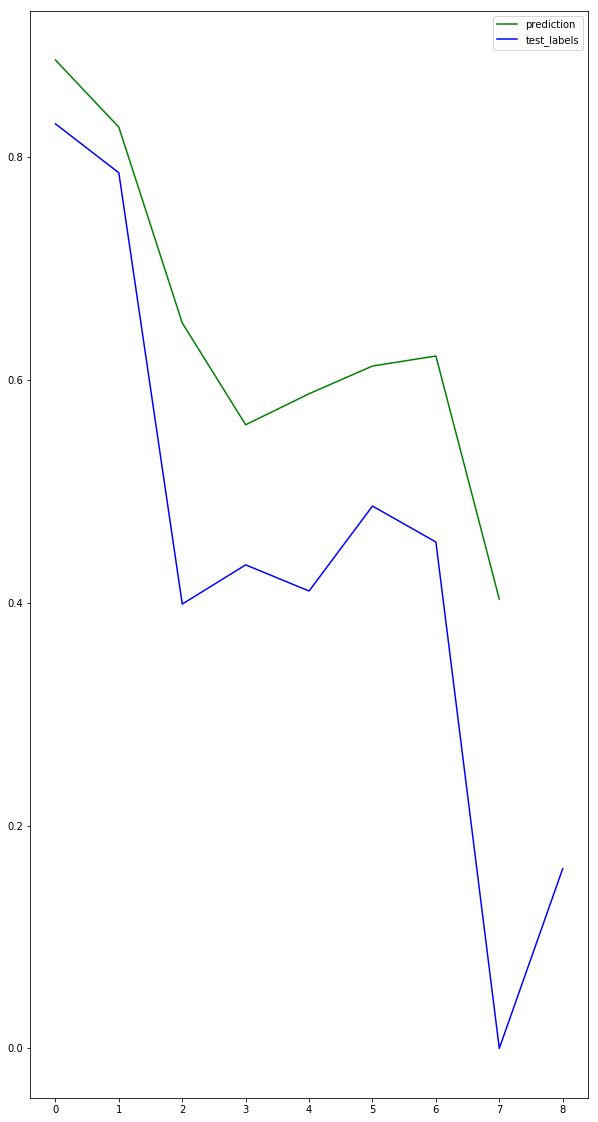

In [35]:
test_and_plot(model, test_features, test_labels)

In [0]:
def get_highest_district(i):
  district_predictions = []
  for j in range(len(district_month_dfs)):
      model, test_features, test_labels = NN_for_district(district_month_dfs[j], 3)
      prediction = test_and_plot(model, test_features, test_labels)
      district_predictions.append(prediction[-i])
  highest_district_index = district_predictions.index(max(district_predictions))
  highest_districts = districts[highest_district_index]
  return highest_districts

In [44]:
highest_district

'B2'

In [15]:
for i in range(1, 10):
  print(f'{get_highest_district(i)}')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
B2
B2
B2
B2
B2
B2
B2
B2


In [26]:
incidents = pd.DataFrame(crime_district.groupby('DISTRICT').size())

In [32]:
incidents.index.rename('District')

Index(['A1', 'A15', 'A7', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13', 'E18',
       'E5'],
      dtype='object', name='District')

B2, C11, D4 have the highest counts over the entire period cover by the dataset. No wonder why the model keeps predicting B2 to be highest_district

In [19]:
districts_demographics = pd.read_csv('districts_demographics.csv', index_col = 'District')

In [20]:
districts_demographics.head()

,Total Pop,Median Age,Aggregate Income,Per Capita Income,Pop 3+,Enrolled,Percent,Total Household,Married Household,Single Parent Household,...,Pop 25+,<HS,HS Grad,Some College,BS/BA +,Total Pop.1,Civilian Labor Force,LPFR,Employed Civilians,Unemployment Rate
District,,,,,,,,,,,,,,,,,,,,,
A1,41260,32.5,2887442800,69981.64809,39964,9413,0.235537,16727,5021,1035,...,31071,3127,2321,2924,22699,38392,27315,0.711476,25972,0.049167
A7,44989,34.0,1127158600,25054.09322,43281,9565,0.220998,15820,4941,4280,...,31457,10114,9744,5150,6449,36767,27731,0.754236,25235,0.090008
A15,18058,34.0,1084181400,60038.84151,17127,3455,0.201728,8457,2712,1219,...,13489,1213,2147,1762,8367,14635,11089,0.757704,10422,0.060150
B2,67952,30.5,1216415100,17901.09342,65714,25502,0.388076,25030,4067,8901,...,38834,8985,10491,9066,10292,55735,32758,0.587746,28628,0.126076
B3,24268,38.0,488453600,20127.47651,23541,6241,0.265112,8599,2194,3661,...,16857,3588,5675,4890,2704,19724,13590,0.689008,11544,0.150552


In [35]:
districts_demographics = pd.merge(districts_demographics, incidents, left_index = True, right_index = True)

In [38]:
districts_demographics.rename(columns = {0: 'Incidents'}, inplace = True)

In [39]:
districts_demographics.head()

,Total Pop,Median Age,Aggregate Income,Per Capita Income,Pop 3+,Enrolled,Percent,Total Household,Married Household,Single Parent Household,...,<HS,HS Grad,Some College,BS/BA +,Total Pop.1,Civilian Labor Force,LPFR,Employed Civilians,Unemployment Rate,Incidents
A1,41260,32.5,2887442800,69981.64809,39964,9413,0.235537,16727,5021,1035,...,3127,2321,2924,22699,38392,27315,0.711476,25972,0.049167,42324
A7,44989,34.0,1127158600,25054.09322,43281,9565,0.220998,15820,4941,4280,...,10114,9744,5150,6449,36767,27731,0.754236,25235,0.090008,15383
A15,18058,34.0,1084181400,60038.84151,17127,3455,0.201728,8457,2712,1219,...,1213,2147,1762,8367,14635,11089,0.757704,10422,0.060150,7756
B2,67952,30.5,1216415100,17901.09342,65714,25502,0.388076,25030,4067,8901,...,8985,10491,9066,10292,55735,32758,0.587746,28628,0.126076,59889
B3,24268,38.0,488453600,20127.47651,23541,6241,0.265112,8599,2194,3661,...,3588,5675,4890,2704,19724,13590,0.689008,11544,0.150552,42737


In [40]:
from scipy.stats import pearsonr, spearmanr

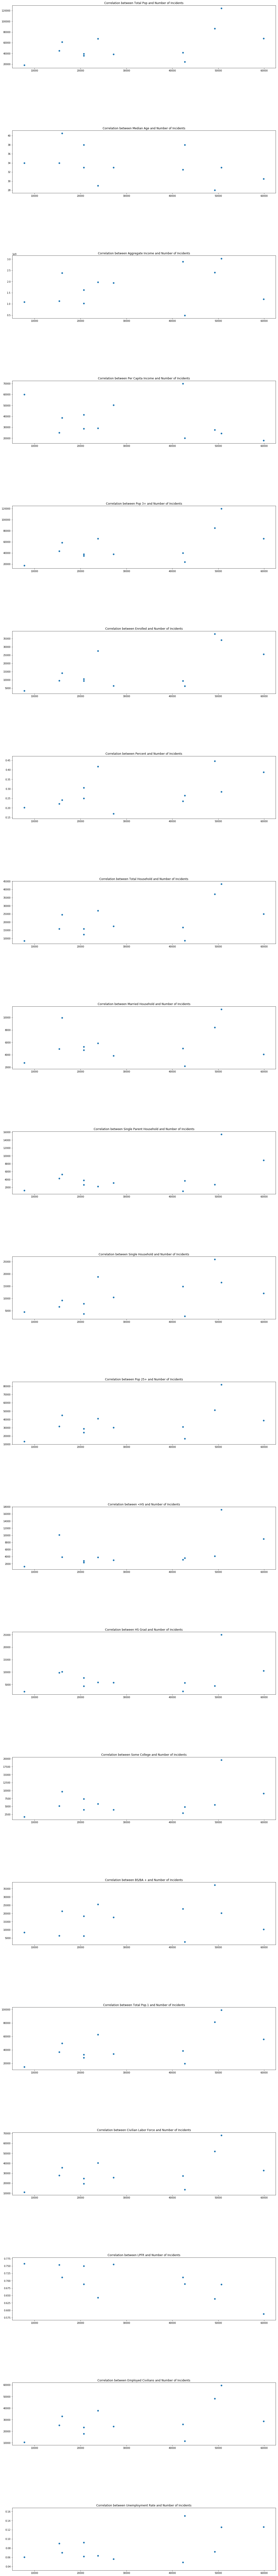

In [55]:
fig, axes = plt.subplots (nrows = 21, figsize = (20, 200))
plt.subplots_adjust(hspace = 1)
columns = districts_demographics.columns[:21]
for i in range(len(columns)):
    axes[i].scatter(districts_demographics['Incidents'], districts_demographics[columns[i]])
    axes[i].set(title = 'Correlation between {} and Number of Incidents'.format(columns[i]))

In [57]:
pearson_corrs = []
spearman_corrs = []
for i in range(21):
    pearson_corr, _ = pearsonr(districts_demographics['Incidents'], districts_demographics[columns[i]])
    pearson_corrs.append(pearson_corr)
    
    spearman_corr,  _ = spearmanr(districts_demographics['Incidents'], districts_demographics[columns[i]])
    spearman_corrs.append(spearman_corr)

<BarContainer object of 21 artists>

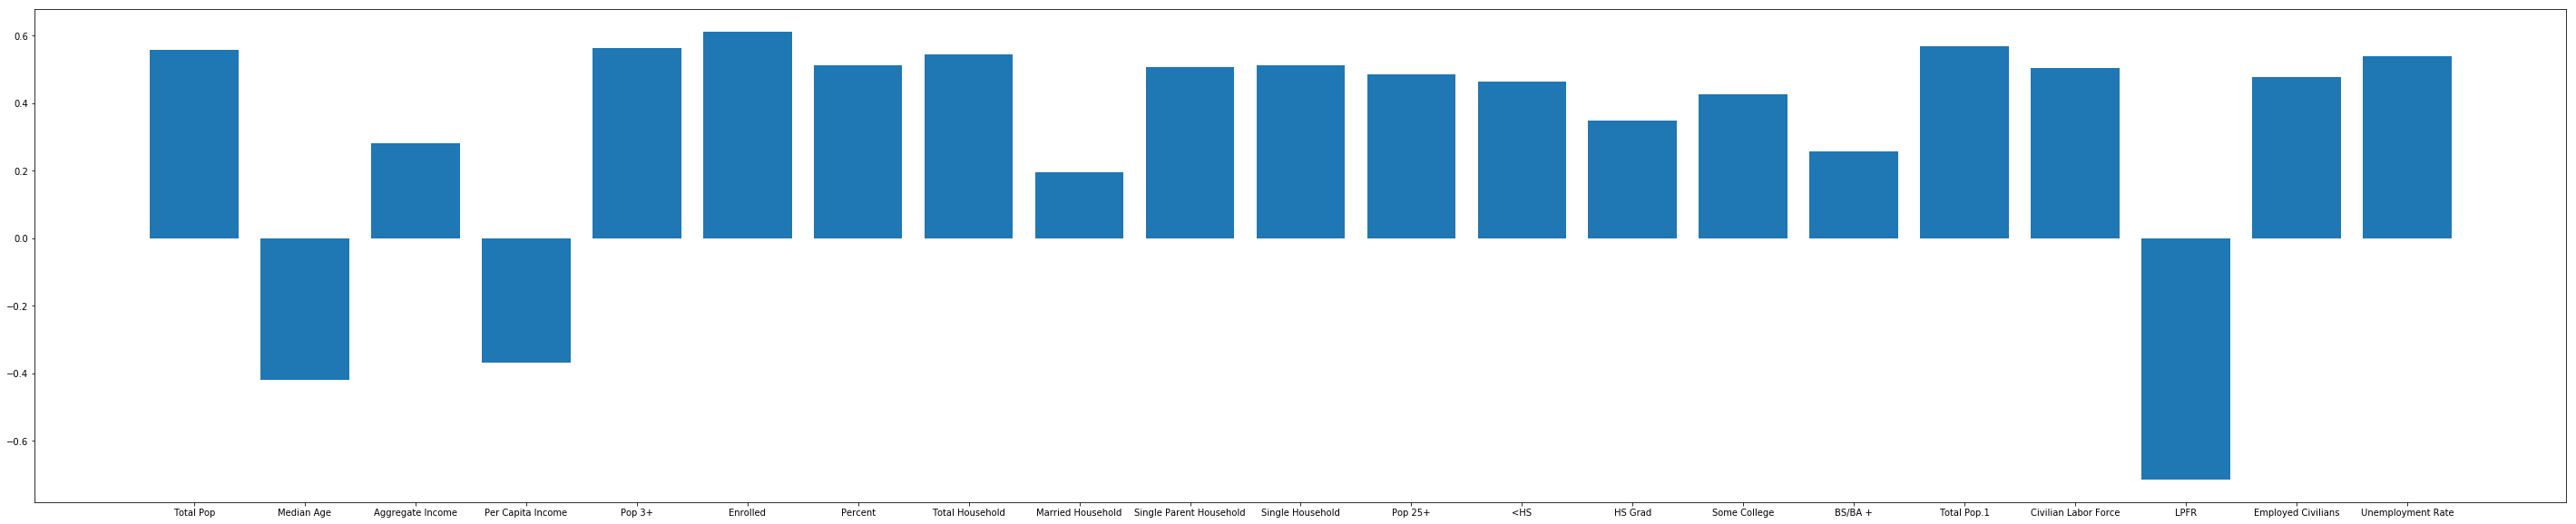

In [62]:
plt.figure(figsize = (50, 10))
plt.bar(columns, height = pearson_corrs) 

<BarContainer object of 21 artists>

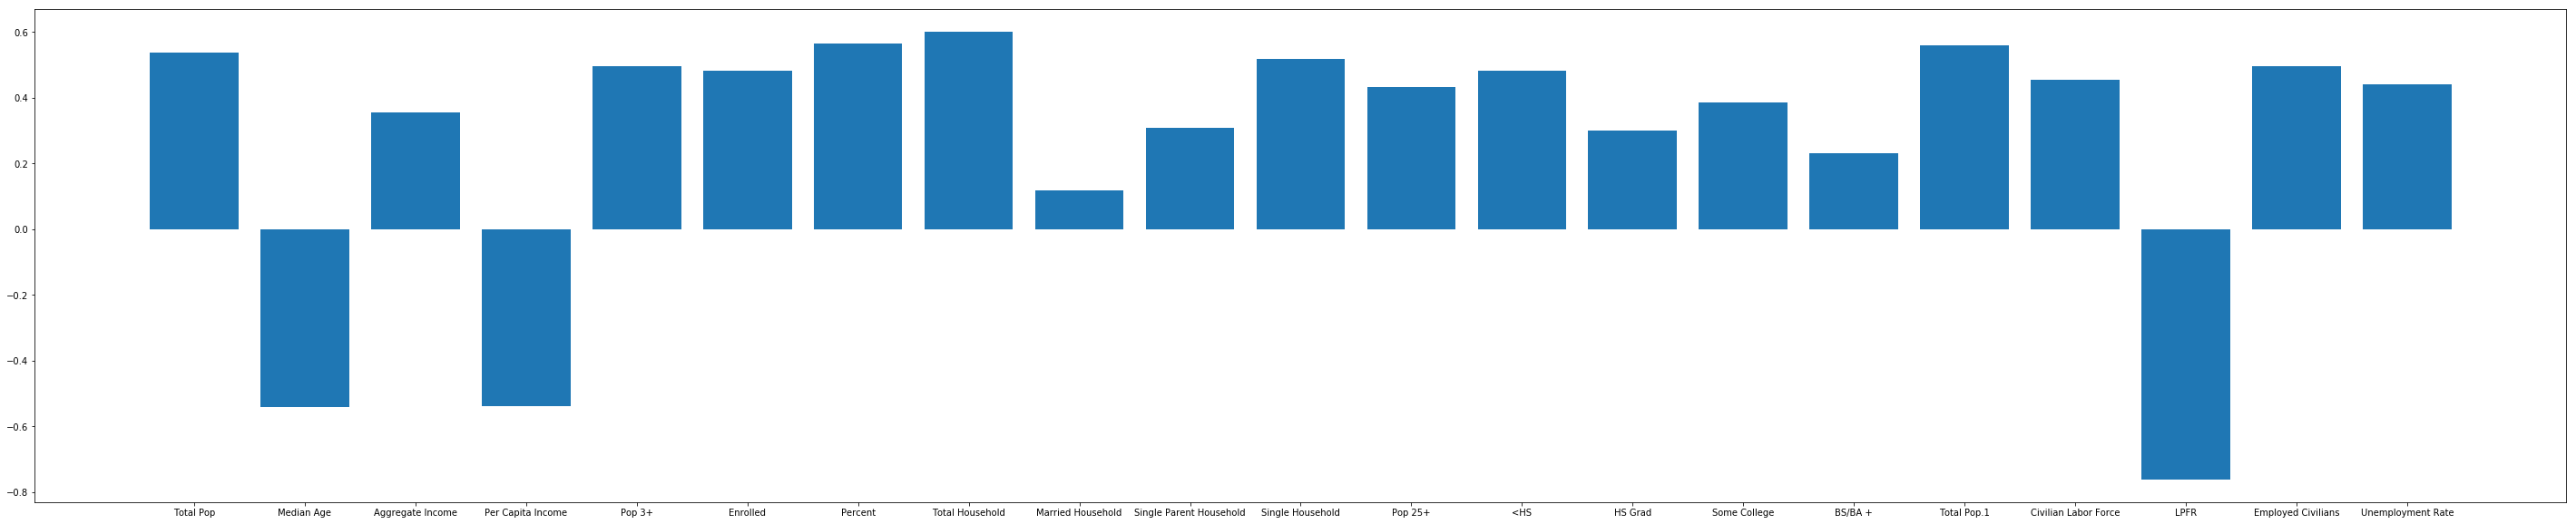

In [63]:
plt.figure(figsize = (50, 10))
plt.bar(columns, height = spearman_corrs)